In [146]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu117
0.15.2+cu117


In [147]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [148]:
X_train = datasets.FashionMNIST(root='data/', download=True, train=True, transform=transforms.ToTensor(), target_transform=None) # how dowe want to transform the target)
X_test = datasets.FashionMNIST(root='data/', download=True, train=False, transform=transforms.ToTensor(), target_transform=None )# how dowe want to transform the target)                               

In [149]:
len(X_train) , len(X_test)

(60000, 10000)

In [150]:
images , label = X_train[0]

In [151]:
len(images)

1

In [152]:
classes1 = X_train.classes
classes1

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [153]:
class_to_idx1 = X_train.class_to_idx
class_to_idx1

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [154]:
y_train = X_train.targets
x_train = X_train.data

In [155]:
images.shape,classes1[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

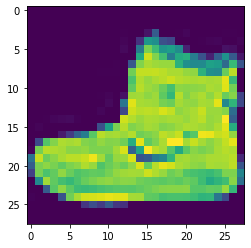

In [156]:
plt.imshow(images.squeeze())

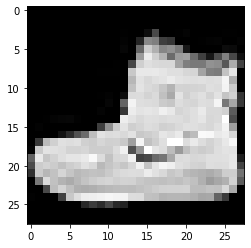

In [157]:
plt.imshow(images.squeeze(),cmap= "gray")

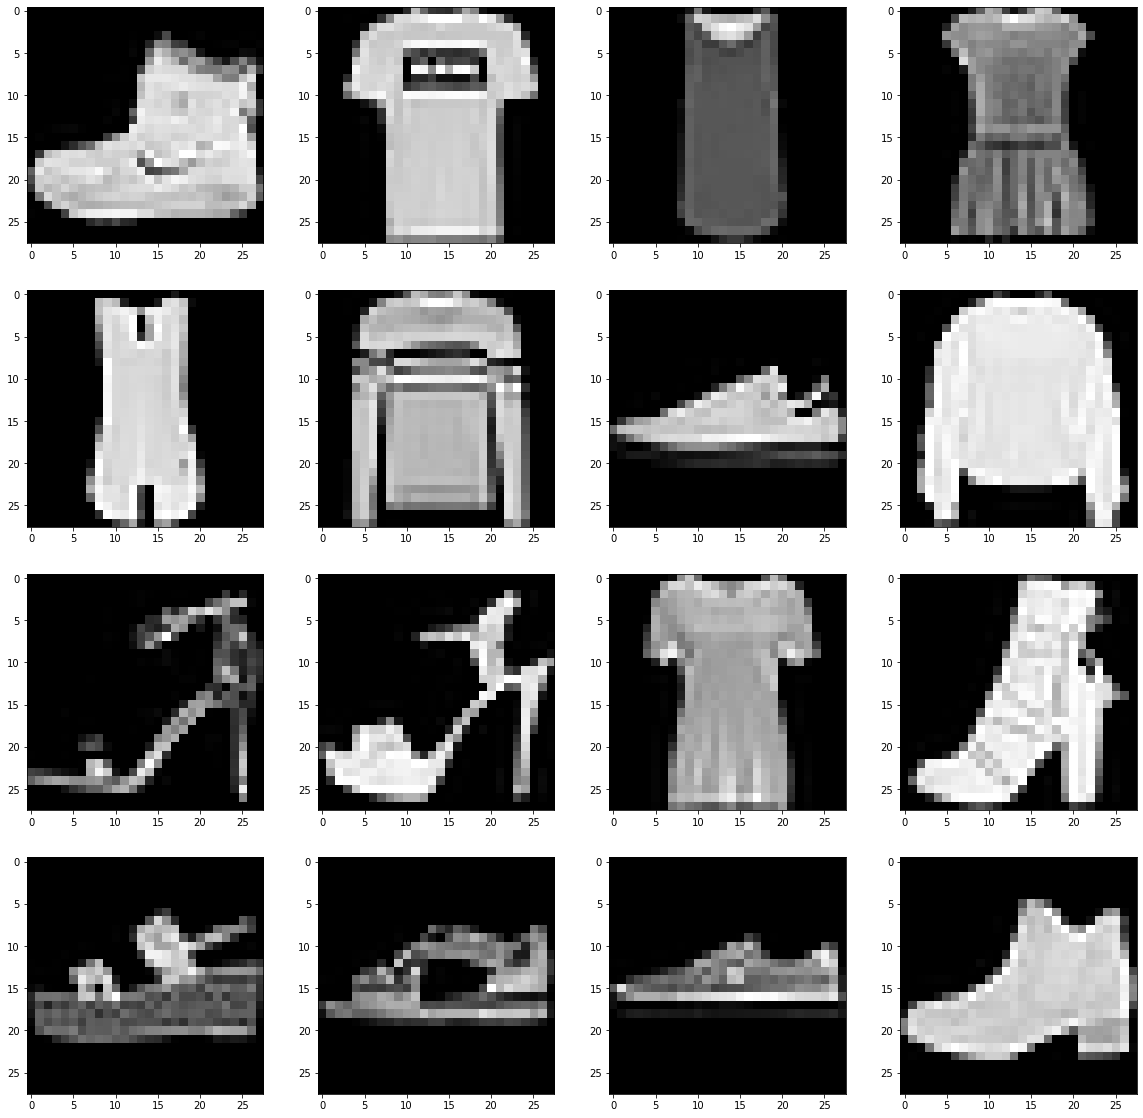

In [158]:
plt.figure(figsize=(20,20
                    ))
for i in range(16):
    plt.subplot(4, 4, i+1)
    ss = torch.randint(0,len(X_train),size=[1]).item()
    image1 , label1 = X_train[ss]
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

we divide into mini - batches
1 . improve model's effficiency

2. givemodel a chance to learn in each epoch and update gradients as batches 

In [159]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=X_train,batch_size=32,shuffle = True)
test_dataloader = DataLoader(dataset=X_test,batch_size = 32,shuffle = False)

In [160]:
train_data , train_labels = next(iter(train_dataloader))
test_data , test_labels =   next(iter(test_dataloader))
print(train_data.shape)

torch.Size([32, 1, 28, 28])


Text(0.5, 1.0, 'Sneaker')

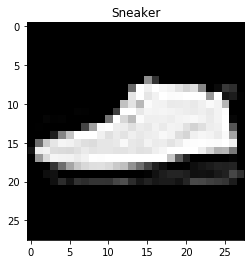

In [161]:
#torch.manual_seed(42)

random_idx = torch.randint(0,len(train_data),size=[1]).item()
img , l = train_data[random_idx] , train_labels[random_idx]
plt.imshow(img.squeeze(),cmap = "gray")
plt.title(classes1[l])




In [162]:
class fashion_model_v0(nn.Module):
    def __init__(self,input_shape,output_shape,hidden_units):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape , out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    def forward(self,x : torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)
    

        

In [163]:

model1 = fashion_model_v0(input_shape=784,output_shape=len(class_to_idx1.keys()),hidden_units=10).to(device)#28*28

model1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0215,  0.0034, -0.0353,  ...,  0.0309, -0.0218, -0.0176],
                      [ 0.0069,  0.0097,  0.0137,  ...,  0.0087, -0.0238,  0.0124],
                      [-0.0214, -0.0112, -0.0170,  ..., -0.0324,  0.0066, -0.0149],
                      ...,
                      [ 0.0015, -0.0231,  0.0100,  ...,  0.0051,  0.0048, -0.0134],
                      [-0.0141, -0.0112,  0.0124,  ...,  0.0278,  0.0035, -0.0279],
                      [ 0.0321,  0.0080,  0.0258,  ..., -0.0054, -0.0284, -0.0354]])),
             ('layer_stack.1.bias',
              tensor([-0.0013,  0.0105, -0.0211,  0.0281,  0.0169,  0.0215,  0.0165, -0.0344,
                      -0.0065,  0.0186])),
             ('layer_stack.2.weight',
              tensor([[ 0.1565, -0.2877, -0.1792,  0.2305, -0.2618,  0.2397, -0.0610,  0.0232,
                        0.1542,  0.0851],
                      [-0.2027,  0.1030, -0.2715, -0.1596, -0.0555, -0.0633,  0.

In [164]:
dummy_x = torch.rand([1,1,28,28])

model1(dummy_x)

tensor([[-0.0505,  0.7471,  0.3323, -0.3375, -0.1663, -0.1013,  0.2287,  0.0197,
          0.0082,  0.0183]], grad_fn=<AddmmBackward0>)

In [165]:
loss = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params = model1.parameters(),lr = 0.01)

In [166]:
def accuracy_fn(y_pred, y_true):
   correct = torch.eq(y_true,y_pred).sum().item()
   acc = (correct/len(y_pred)) * 100
   return acc








In [167]:
from timeit import default_timer
def print_train_time(start : float,
                     end : float ,
                     device : torch.device = None):
    total_time = end - start
    print(f"Train Time : {total_time} on device {torch.device} ")
    return total_time


In [200]:
from tqdm.auto import tqdm
def train_model(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn,val_data_loader : torch.utils.data.DataLoader,epochs:int,optimizer:torch.optim.Optimizer):
    
    torch.manual_seed(42)
   
    for epoch in tqdm(range(epochs)):
        print(f"Epoch : {epoch}")
        train_loss = 0
        train_acc = 0
        for batch,(X,y) in enumerate(data_loader):
            
            model.train()
            y_preds = model(X)
            
            y_preds1_train = torch.softmax(y_preds,dim = 1).argmax(dim = 1)
            #loss1 = loss(y_preds,train_labels.squeeze(dim = 1).type(torch.LongTensor))#yy[0].unsqueeze(dim = 1).type(torch.float32)
            
            loss1 = loss_fn(y_preds,y)
            train_loss += loss1
            optimizer.zero_grad()
            loss1.backward()
            optimizer.step()
            train_acc += accuracy_fn(y_true=y,y_pred=y_preds1_train)
        train_acc /= len(train_dataloader)
        
        train_loss /= len(train_dataloader)
        test_loss , test_acc = 0,0
        model.eval()
        with torch.inference_mode():
            for X_test,y_test in val_data_loader:
                test_pred = model(X_test)
                y_preds1_test = torch.softmax(test_pred,dim = 1).argmax(dim = 1)
                test_loss += loss_fn(test_pred,y_test)    
                test_acc += accuracy_fn(y_true=y_test,y_pred=y_preds1_test)
            test_loss /= len(test_dataloader)
            test_acc /= len(test_dataloader)
            
        print("Epoch: {}, Train Loss: {}, Train acc: {} , Test Loss: {} , Test acc: {}".format(epoch,loss1.item(),train_acc,test_loss.item(),test_acc))

In [201]:
start_time = default_timer()

from tqdm.auto import tqdm
train_model(model1,train_dataloader,loss_fn=loss,optimizer=optimizer,epochs=3,val_data_loader=test_dataloader,accuracy_fn=accuracy_fn)

end_time = default_timer()
# print(y_preds2[:5])
# print(y_test[:5].squeeze(dim = 1).type(torch.LongTensor))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0


 33%|███▎      | 1/3 [00:05<00:11,  5.76s/it]

Epoch: 0, Train Loss: 0.21330341696739197, Train acc: 83.46666666666667 , Test Loss: 0.48416557908058167 , Test acc: 83.21685303514377
Epoch : 1


 67%|██████▋   | 2/3 [00:12<00:06,  6.18s/it]

Epoch: 1, Train Loss: 0.6893587708473206, Train acc: 83.77333333333333 , Test Loss: 0.4906410574913025 , Test acc: 83.0870607028754
Epoch : 2


100%|██████████| 3/3 [00:18<00:00,  6.04s/it]

Epoch: 2, Train Loss: 0.4238353371620178, Train acc: 83.91 , Test Loss: 0.5648960471153259 , Test acc: 81.15015974440895


In [202]:
print_train_time(start_time,end_time)

Train Time : 18.131778836002923 on device <class 'torch.device'> 


18.131778836002923

In [203]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn ):
    loss,acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            y_pred = model(X)
            loss3 = loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim = 1))
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name" : model.__class__.__name__,
            "model_loss" : loss3.item(),
            "model_acc" : acc}

In [204]:
model_results = eval_model(model1,test_dataloader,loss,accuracy_fn=accuracy_fn)
model_results

100%|██████████| 313/313 [00:00<00:00, 535.64it/s]


{'model_name': 'fashion_model_v0',
 'model_loss': 0.40566009283065796,
 'model_acc': 81.15015974440895}

In [205]:
!nvidia-smi


/bin/sh: 1: nvidia-smi: not found


Convolution Network

In [206]:
class fashion_model_v1(nn.Module):
    def __init__(self,input_shape,output_shape,hidden_units):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(kernel_size=2,stride=1,padding=1,in_channels=input_shape,out_channels=hidden_units),
            nn.ReLU(),
            nn.Conv2d(kernel_size=2,stride=1,padding=1,in_channels=hidden_units,out_channels=hidden_units),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
          
            nn.Linear(in_features=hidden_units*15*15, out_features=output_shape)
            
        )
    def forward(self,x : torch.Tensor) -> torch.Tensor:
        c = self.conv(x)
     
        c = self.layer_stack(c)
        
        

        return c
    

        

In [207]:
model2 = fashion_model_v1(input_shape=1,output_shape=10,hidden_units=10)

model2.state_dict()

OrderedDict([('conv.0.weight',
              tensor([[[[-0.1096,  0.1009],
                        [-0.2434,  0.2936]]],
              
              
                      [[[ 0.4408, -0.3668],
                        [ 0.4346,  0.0936]]],
              
              
                      [[[ 0.3694,  0.0677],
                        [ 0.2411, -0.0706]]],
              
              
                      [[[ 0.3854,  0.0739],
                        [-0.2334,  0.1274]]],
              
              
                      [[[-0.2304, -0.0586],
                        [-0.2031,  0.3317]]],
              
              
                      [[[-0.3947, -0.2305],
                        [-0.1412, -0.3006]]],
              
              
                      [[[ 0.0472, -0.4938],
                        [ 0.4516, -0.4247]]],
              
              
                      [[[ 0.3860,  0.0832],
                        [-0.1624,  0.3090]]],
              
              
         

In [208]:
torch.manual_seed(42
                  )

image = torch.rand([3,28,28])
image.shape , test_data[0].shape



(torch.Size([3, 28, 28]), torch.Size([1, 28, 28]))

torch.Size([10, 26, 26])
torch.Size([10, 13, 13])


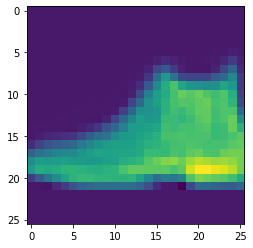

In [209]:
conv_layer = nn.Conv2d(kernel_size=3,stride=1,padding=0,in_channels=1,out_channels=10)
df = nn.MaxPool2d(kernel_size=2,stride=2)

cc = conv_layer(test_data[0])
h = df(cc)

plt.imshow(cc[0].detach().numpy())
print(cc.shape)
print(h.shape)






Formula  1  without padding  =  (image_w or h   -  kernel_size  + 1 )/stride

with padding = 

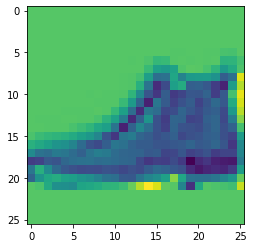

In [210]:
dd = 0
for i in range(10):
    dd += cc[i]
dd/10

plt.imshow(dd.detach().numpy())

In [211]:
loss1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model2.parameters
                              (), lr=0.001)

In [212]:
train_model(model2,loss_fn=loss1,optimizer=optimizer1,epochs=5,val_data_loader=test_dataloader,data_loader=train_dataloader,accuracy_fn=accuracy_fn)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 0


 20%|██        | 1/5 [00:13<00:55, 13.86s/it]

Epoch: 0, Train Loss: 0.27152764797210693, Train acc: 83.09166666666667 , Test Loss: 0.3722091317176819 , Test acc: 86.9408945686901
Epoch : 1


 40%|████      | 2/5 [00:25<00:38, 12.76s/it]

Epoch: 1, Train Loss: 0.4690670073032379, Train acc: 88.02833333333334 , Test Loss: 0.3404255509376526 , Test acc: 87.56988817891374
Epoch : 2


 60%|██████    | 3/5 [00:40<00:27, 13.53s/it]

Epoch: 2, Train Loss: 0.20200958847999573, Train acc: 89.24 , Test Loss: 0.3226839601993561 , Test acc: 88.52835463258786
Epoch : 3


 80%|████████  | 4/5 [00:54<00:13, 13.70s/it]

Epoch: 3, Train Loss: 0.24794451892375946, Train acc: 90.03833333333333 , Test Loss: 0.30518239736557007 , Test acc: 88.9576677316294
Epoch : 4


100%|██████████| 5/5 [01:08<00:00, 13.72s/it]

Epoch: 4, Train Loss: 0.21393345296382904, Train acc: 90.57833333333333 , Test Loss: 0.3002294600009918 , Test acc: 89.15734824281151


In [213]:
for name, layer in model2.named_children():
    print(name)


conv
layer_stack


In [231]:
X_test.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

100%|██████████| 313/313 [00:01<00:00, 304.80it/s]

MulticlassConfusionMatrix()
tensor([9, 2, 1,  ..., 8, 1, 5])


<Figure size 720x720 with 0 Axes>

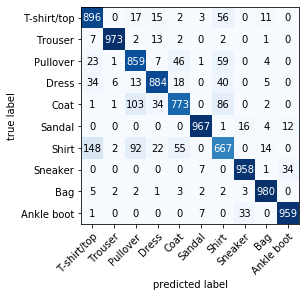

In [236]:
torch.manual_seed(42)
from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix

def eval_model(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader ):
    y_predd = []
  
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            y_pred = model(X)
            y_pp = torch.softmax(y_pred,dim = 1).argmax(dim =1 )
            
            y_predd.append(y_pp)
        plt.figure(figsize=(10,10))    
        cf = ConfusionMatrix(num_classes=10,task='MULTICLASS')
        print(cf)
        y_predd = torch.cat(y_predd)
        print(y_predd)
        cf_tensor = cf(preds = y_predd,target = X_test.targets)
        fig,ax = plot_confusion_matrix(conf_mat=cf_tensor.numpy(),class_names=classes1)
    
    
eval_model(model2,data_loader=test_dataloader)

SAVING A MODEL

In [237]:
torch.save(model2.state_dict(),"models/cnn_model2.pth")